# Examples for pytimber

Accessing the CERN logging database and extracting machine parameters.

In [1]:
%pylab
import pytimber
import datetime

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [5]:
log = pytimber.LoggingDB()

# Search for parameters
Use the wildcard `%`

In [50]:
log.search("%BEAM_INTENSITY%")

['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY',
 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY',
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTDC.B6R4.B1:BEAM_INTENSITY',
 'LHC.BCTDC.B6R4.B1:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTDC.B6R4.B2:BEAM_INTENSITY',
 'LHC.BCTDC.B6R4.B2:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY',
 'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY_LOBW',
 'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY',
 'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY_LOBW',
 'LHC.BCTFR.B6R4.B1.DEV:BEAM_INTENSITY_HBW',
 'LHC.BCTFR.B6R4.B1.DEV:BEAM_INTENSITY_LBW',
 'LHC.BCTFR.B6R4.B1:BEAM_INTENSITY',
 'LHC.BCTFR.B6R4.B1:BEAM_INTENSITY_LOBW',
 'LHC.BCTFR.B6R4.B2.DEV:BEAM_INTENSITY_HBW',
 'LHC.BCTFR.B6R4.B2.DEV:BEAM_INTENSITY_LBW',
 'LHC.BCTFR.B6R4.B2:BEAM_INTENSITY',
 'LHC.BCTFR.B6R4.B2:BEAM_INTENSITY_LOBW',
 'LHC.BWCM.B1:BEAM_INTENSITY',
 'LHC.BWCM.B2:BEAM_INTENSITY']

# Get the latest datapoint
If only one timestamp is given as a parameter, the closest datapoint to it is returned

In [46]:
ts = datetime.datetime.now()
log.get("LHC.BCTDC.A6R4.B1:BEAM_INTENSITY", ts)

(datetime.datetime(2015, 10, 21, 17, 10, 8), -653568190.0)

# Get datapoints in a time range

Use datetime.timedelta to define time-offsets.

Here we get data from one minute in the past over a window of 10 seconds

In [29]:
ts1 = datetime.datetime.now() + datetime.timedelta(seconds=-60)
ts2 = datetime.datetime.now() + datetime.timedelta(seconds=-50)
log.get("LHC.BCTDC.A6R4.B1:BEAM_INTENSITY", ts1, ts2)

([datetime.datetime(2015, 10, 21, 17, 7, 50),
  datetime.datetime(2015, 10, 21, 17, 7, 51),
  datetime.datetime(2015, 10, 21, 17, 7, 52),
  datetime.datetime(2015, 10, 21, 17, 7, 53),
  datetime.datetime(2015, 10, 21, 17, 7, 54),
  datetime.datetime(2015, 10, 21, 17, 7, 55),
  datetime.datetime(2015, 10, 21, 17, 7, 56),
  datetime.datetime(2015, 10, 21, 17, 7, 57),
  datetime.datetime(2015, 10, 21, 17, 7, 58),
  datetime.datetime(2015, 10, 21, 17, 7, 59),
  datetime.datetime(2015, 10, 21, 17, 8)],
 [1519053570.0,
  1086506500.0,
  1403501700.0,
  881973630.0,
  1233572480.0,
  1288567810.0,
  -232761776.0,
  1569105410.0,
  608233150.0,
  883209470.0,
  601435970.0])

# Plot with timestamps

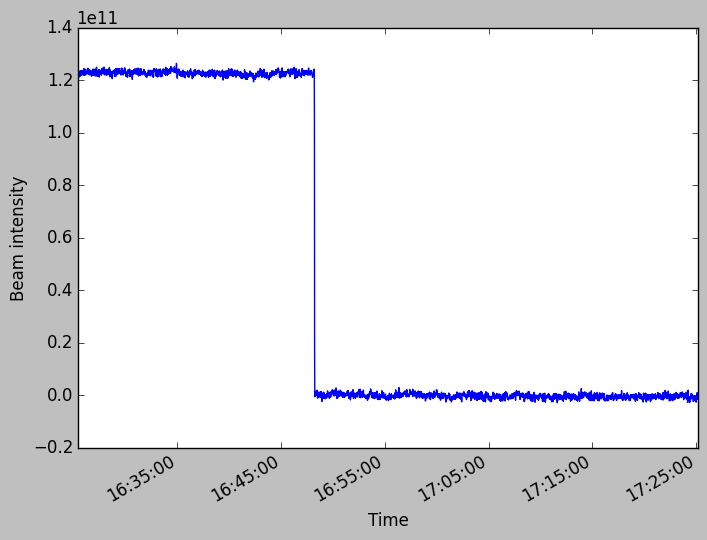

In [81]:
ts1 = datetime.datetime.now() + datetime.timedelta(hours=-1)
ts2 = datetime.datetime.now()
log.get("LHC.BCTDC.A6R4.B1:BEAM_INTENSITY", ts1, ts2)
tss, dat = log.get("LHC.BCTDC.A6R4.B1:BEAM_INTENSITY", ts1, ts2)
plot( tss, dat, "-" )
xlabel("Time")
ylabel("Beam intensity")
xfmt = DateFormatter('%H:%M:%S')
gca().xaxis.set_major_formatter(xfmt)
gcf().autofmt_xdate()
display(gcf())
close()

# Arrays
get individual bunch intensities

2015-10-21 16:25:22.128999
[ 0.  0.  0. ...,  0.  0.  0.]


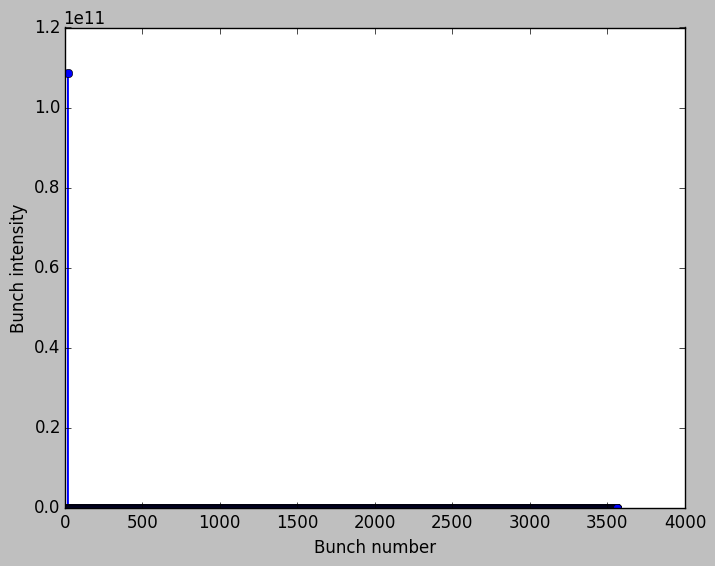

In [82]:
tss, dat = log.get("LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY", ts1)
print( tss )
print( dat )
plot( dat, "o-" )
xlabel("Bunch number")
ylabel("Bunch intensity")
display(gcf())
close()